In [8]:
from PIL import Image
from IPython.display import display
import numpy as np

head = Image.open("./head.png").convert("RGBA")
flag = Image.open("./flag.jpg").convert("RGBA")

原始头像

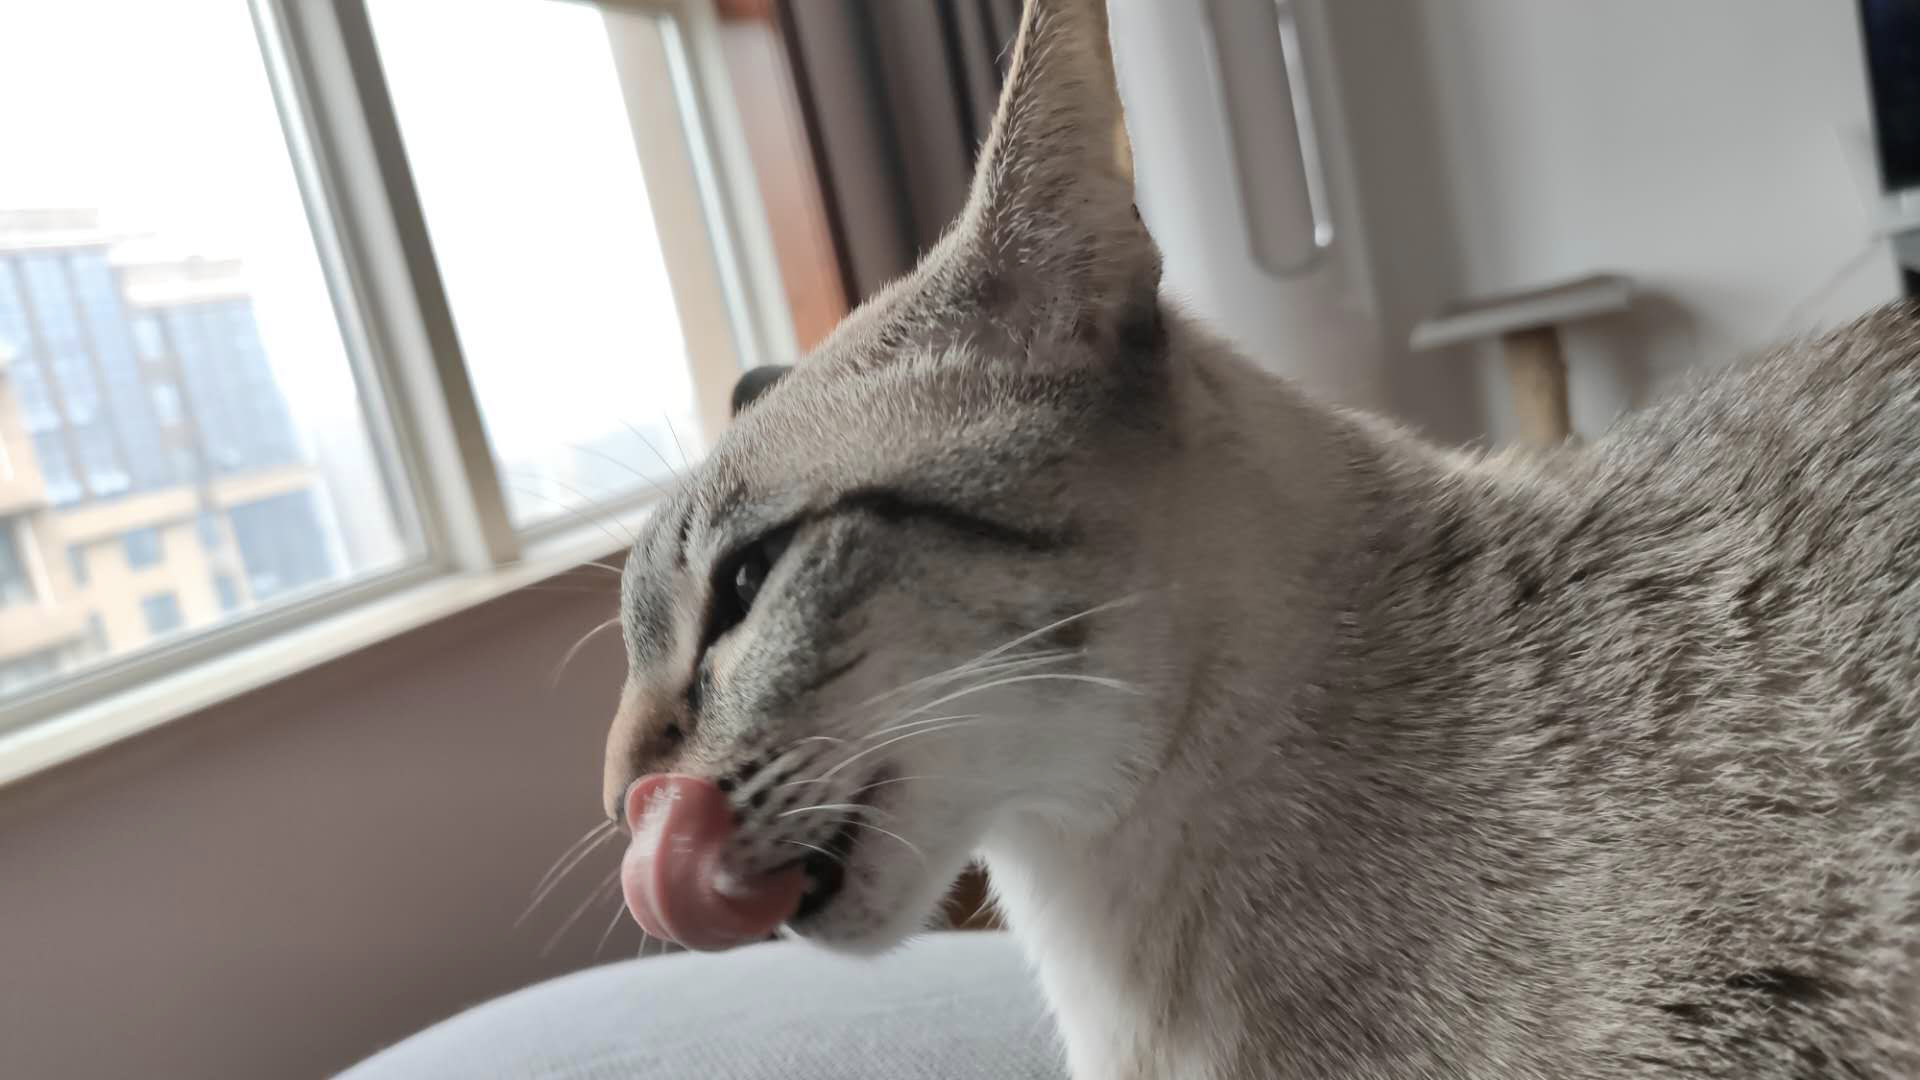

In [9]:
display(head)

创建图像裁剪函数，将任意图像居中裁剪为正方形

In [10]:
def crop_square(img):
    x, y = img.size
    center = (int(x/2), int(y/2))
    # 计算最大内切正方形的边长
    length = int(min(x, y)/2)
    
    left_top = (center[0] - length, center[1] - length)
    right_bottom = (center[0] + length, center[1] + length)
    
    # 创建剪切好的副本
    new_img = img.crop(left_top + right_bottom)
    return new_img

裁剪头像为正方形

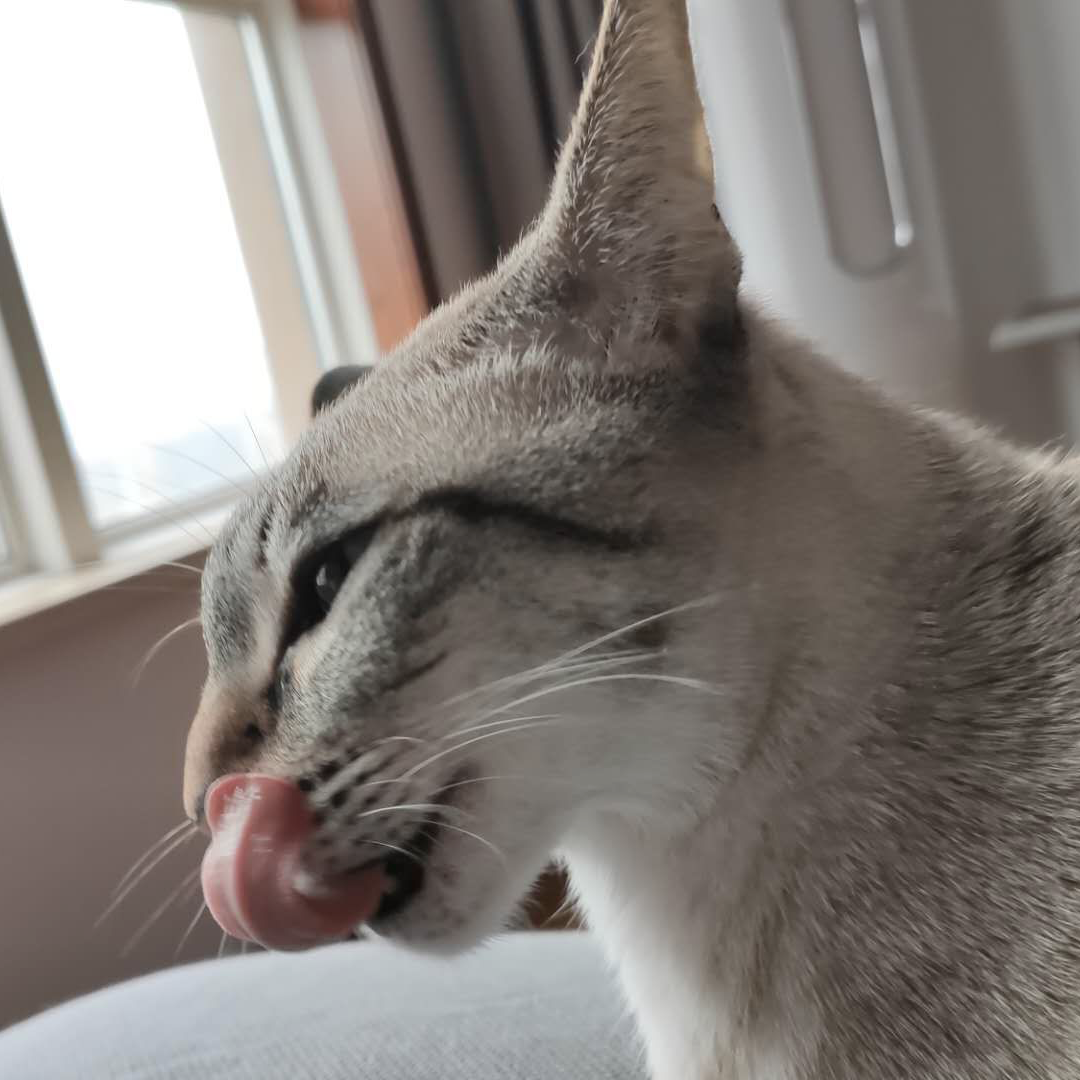

In [18]:
head = crop_square(head)
display(head)

缩放头像素材，与 flag 大小一致，缩放的时候，使用 ANTIALIAS 抗锯齿滤镜

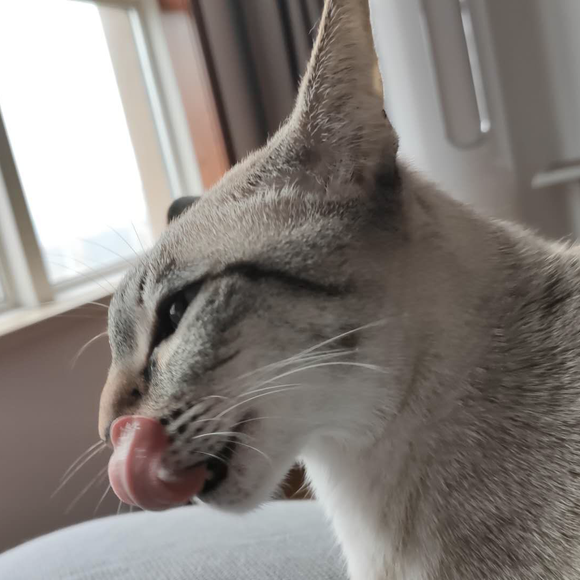

In [19]:
resizedHead = head.resize(flag.size, Image.ANTIALIAS)
display(resizedHead)

创建 Alpha 层，以国旗素材的灰度初始化

In [33]:
alphaLayer = flag.convert("L")
alphaLayer = np.array(alphaLayer)

设置 灰度阈值，100

In [21]:
THRESHOLD = 100

将灰度大于 THESHOLD 的像素设置为 255，否则为 0.

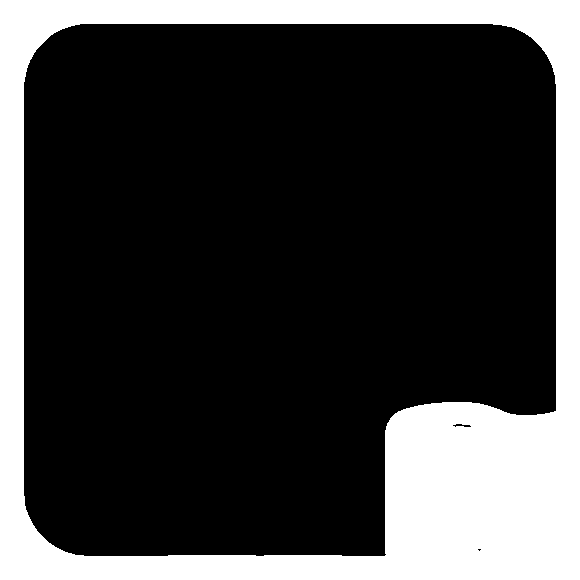

In [34]:
alphaLayer = (alphaLayer > THRESHOLD).astype(np.uint8) * 255
alphaLayer = Image.fromarray(alphaLayer)
display(alphaLayer)

在 resizedHead 上粘贴 flag，resizedHead 与 flag 一样大，所以 flag 只要与 head 左上角对齐就可以了

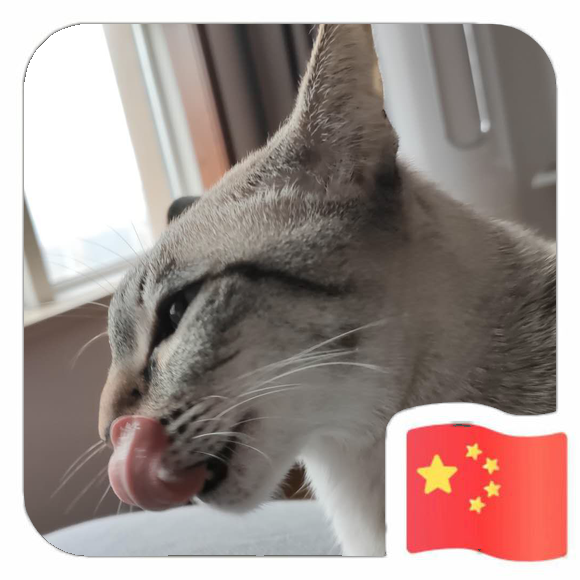

In [31]:
resizedHead.paste(flag, (0, 0), mask= alphaLayer)
display(resizedHead)

In [ ]:
完成了